In [152]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns



In [153]:
#read the input data file
supermarket_sales_data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [154]:
#Checking columns and their data types
supermarket_sales_data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [155]:
#Dropping the Tax column (high correlation as can be seen in Confirmatory Data Analysis)
supermarket_sales_data.drop(columns=['Tax 5%'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [156]:
#Changing the data type of the Date columns to datetime
supermarket_sales_data['Date'] = pd.to_datetime(supermarket_sales_data['Date'])


In [157]:
#We can see that the date column datatypes have been changed to datetime
supermarket_sales_data.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [158]:
#checking if there are any null values
supermarket_sales_data.isnull().values.any()

False

In [159]:
#summary of supermarket_sales_data
supermarket_sales_data.head(15)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [160]:
#Finding the different product lines available

In [161]:
supermarket_sales_data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [162]:
supermarket_sales_data['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

Text(0.5, 1.0, 'Quantity by product line')

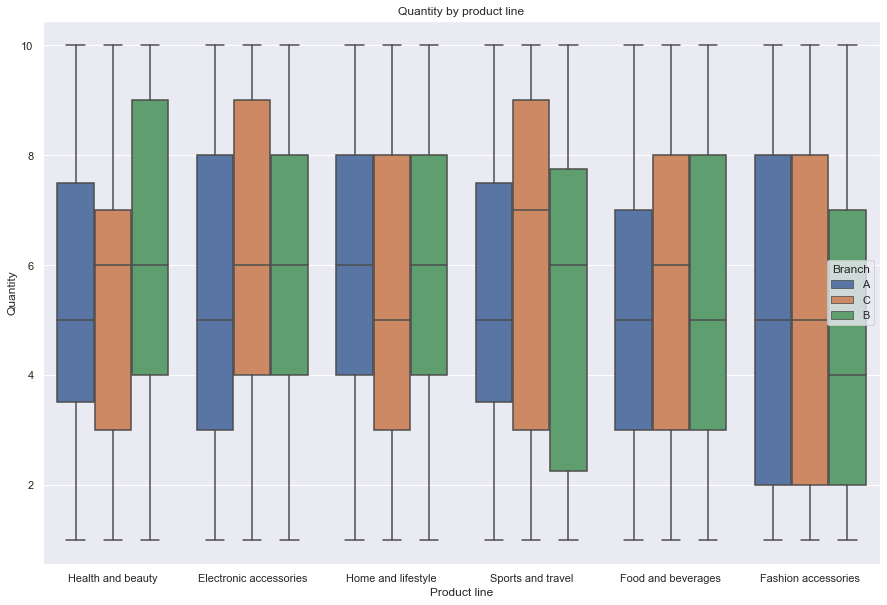

In [165]:
#Analysis : To find which product line has sold more quantity by branch
plt.figure(figsize = (15,10))
sns.boxplot(x='Product line',y='Quantity',data=supermarket_sales_data, hue='Branch')
plt.title("Quantity by product line")


Text(0.5, 1.0, 'Total sales by product line')

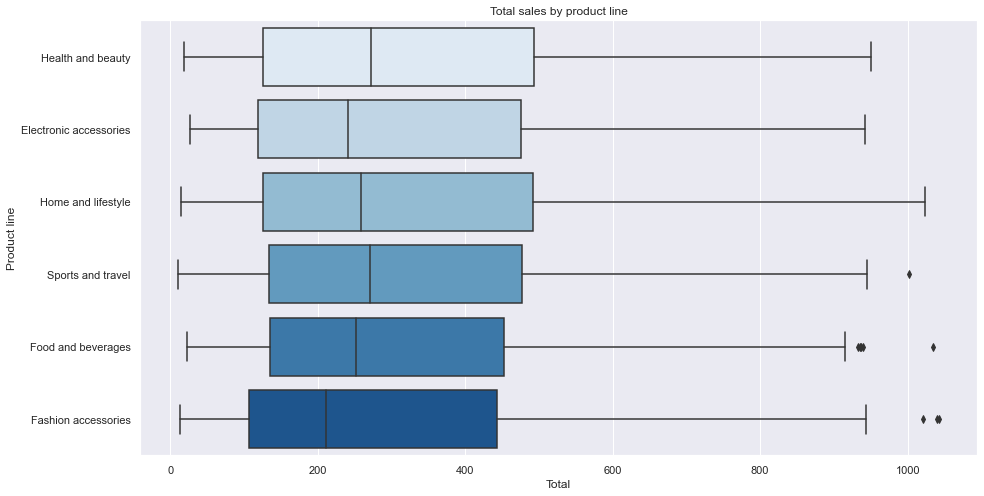

In [199]:
#Analysis : Total sales by product line
plt.figure(figsize = (15,8))
sns.boxplot(y = 'Product line', x = 'Total', data=supermarket_sales_data, palette="Blues" )
plt.title("Total sales by product line")


Text(0.5, 1.0, 'Total sales by product line and branch')

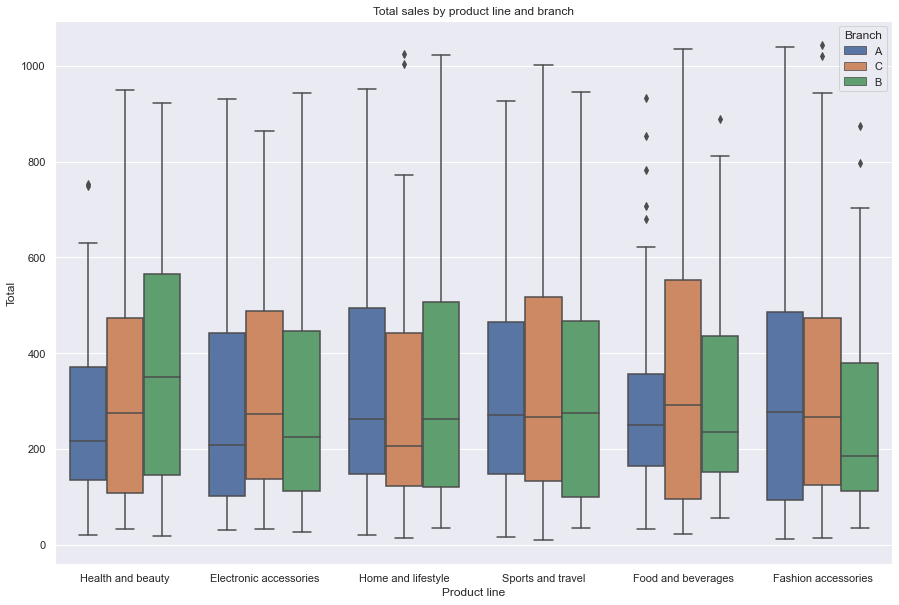

In [200]:
#Analysis :sales of product lines by different branches

sns.set(rc = {'figure.figsize':(15,8)})
supermarket_sales_data['day'] = (supermarket_sales_data['Date']).dt.day_name()

plt.figure(figsize = (15,10))
sns.boxplot(x='Product line',y='Total',data=supermarket_sales_data, hue='Branch')
plt.title("Total sales by product line and branch")


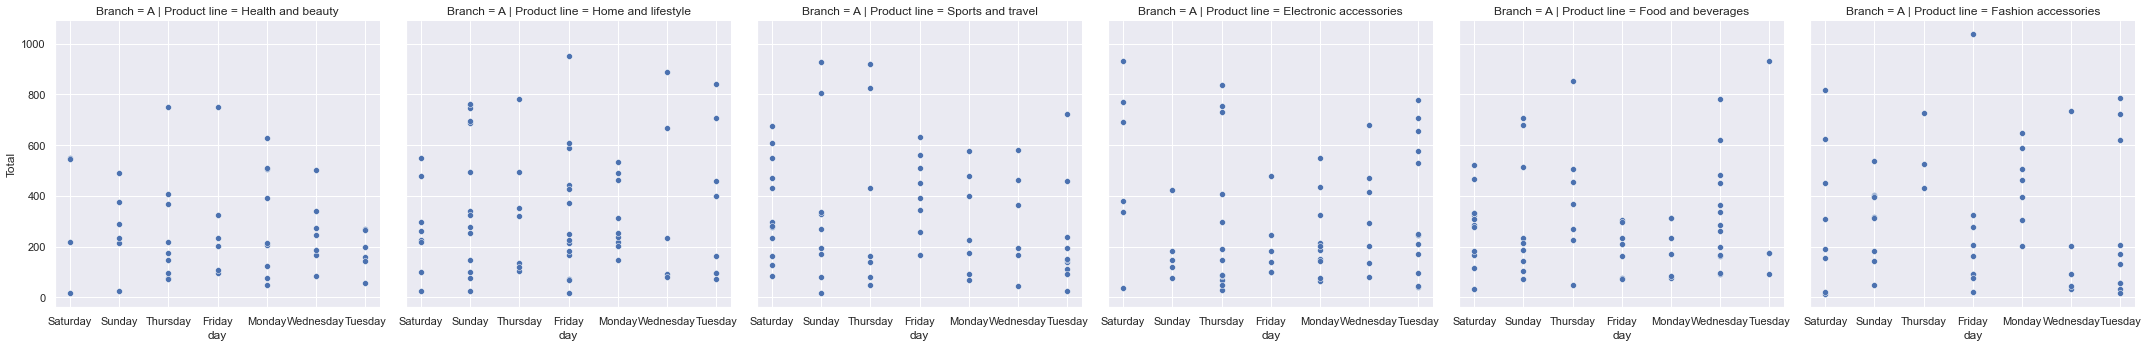

In [203]:
#Analysis : Product line by branch and day

sns.set(rc = {'figure.figsize':(15,8)})
supermarket_sales_data['day'] = (supermarket_sales_data['Date']).dt.day_name()
#Branch A
list1=['A']
filtered_data_A = supermarket_sales_data.loc[supermarket_sales_data['Branch'].isin(list1)]
pl=sns.relplot(x="day",  y = 'Total', col= 'Product line' , row= 'Branch',estimator = None, legend=False,data =filtered_data_A)



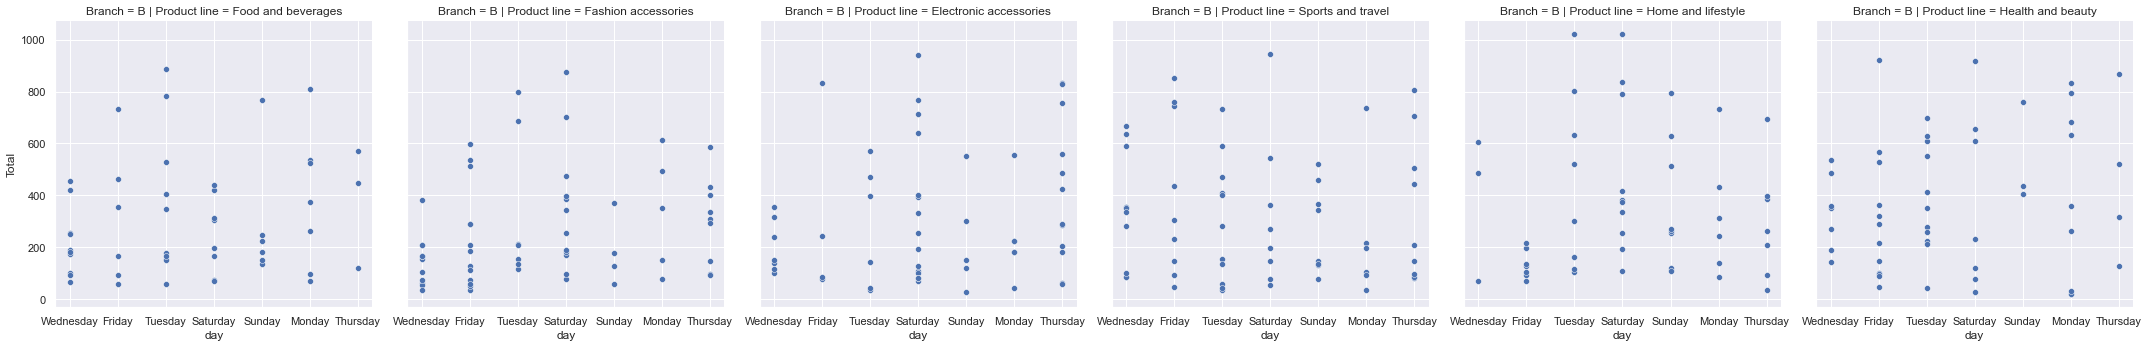

In [204]:
#Branch B
list1=['B']
filtered_data_B = supermarket_sales_data.loc[supermarket_sales_data['Branch'].isin(list1)]
pl=sns.relplot(x="day",  y = 'Total', col= 'Product line' , row= 'Branch',estimator = None, legend=False,data =filtered_data_B)



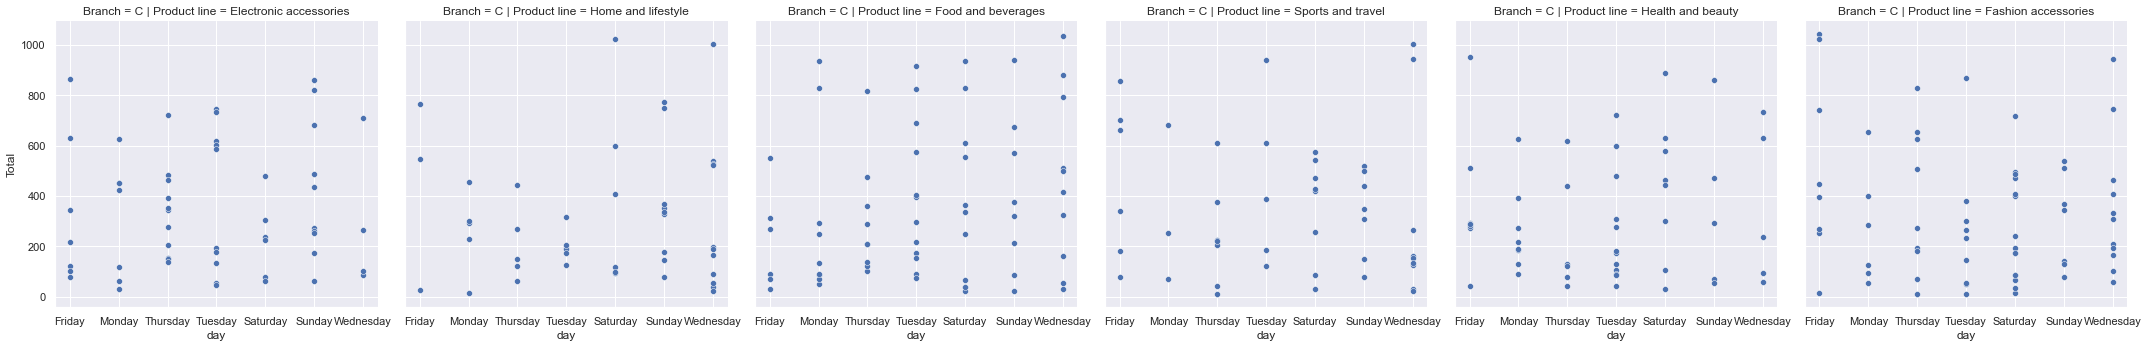

In [205]:
#Branch C
list1=['C']
filtered_data_C = supermarket_sales_data.loc[supermarket_sales_data['Branch'].isin(list1)]
pl=sns.relplot(x="day",  y = 'Total', col= 'Product line' , row= 'Branch',estimator = None, legend=False,data =filtered_data_C)


Text(0.5, 1.0, 'Count of purchases per product line by gender')

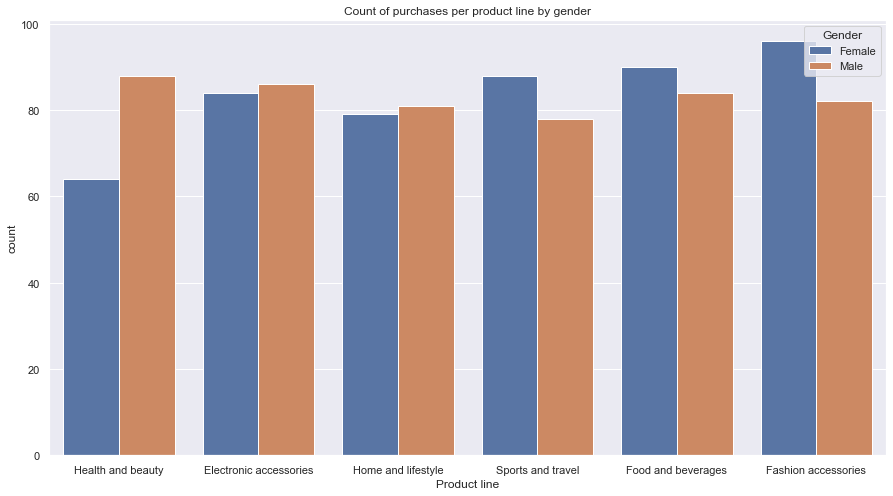

In [201]:
#Analysis: To find out which product lines are most popular among the two genders
plt.figure(figsize = (15,8))
sns.countplot(x="Product line", hue="Gender", data=supermarket_sales_data)
plt.title("Count of purchases per product line by gender")

Text(0.5, 1.0, 'Rating by product line')

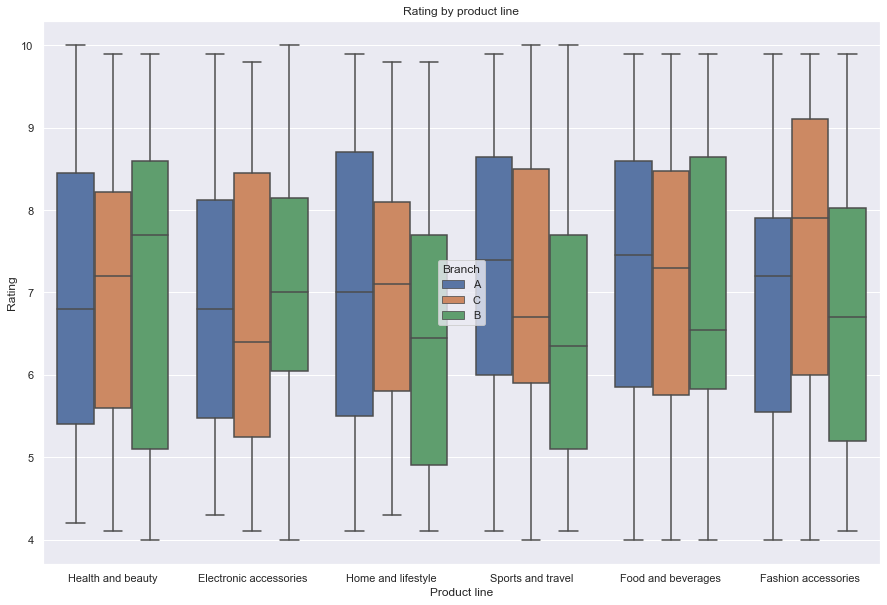

In [202]:
#Analysis : Rating of product line by branch
plt.figure(figsize = (15,10))
sns.boxplot(x='Product line',y='Rating',data=supermarket_sales_data, hue='Branch')
plt.title("Rating by product line")